# 네이버 언론사별 랭킹 뉴스 데이터 수집 및 시각화


*   https://news.naver.com/main/ranking/popularDay.naver


## 1.패키지 설치 및 임포트

In [1]:
!pip install konlpy
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.9 MB/s eta 0:00:00


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
import datetime
from pytz import timezone

import warnings
warnings.filterwarnings('ignore')

## 2.네이버 언론사별 랭킹뉴스 - 많이 본 뉴스 크롤링

In [3]:
# 1) 데이터 프레임 생성
data = pd.DataFrame(columns=['언론사명', '순위', '기사제목', '기사링크', '수집일자'])

# 2) 네이버 언론사별 랭킹 뉴스 URL
url ='https://news.naver.com/main/ranking/popularDay.naver'

# 3) url 접속하여 html 가져오기
html = urlopen(url)

# 4) HTML 태크 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser')

# 5) 네이버 랭킹 정보가 있는 div만 추출 -> rankingnews_box 가져오기
div = soup.find_all('div', {'class': 'rankingnews_box'})

# 6) 네이버 랭킹 언론사명, 기사제목 등 데이터 수집

for index_div in range(0, len(div)):

  # 언론사명 추출
  strong = div[index_div].find('strong', {'class': 'rankingnews_name'})
  press = strong.text
  print(press)

  # 5개의 순위 기사 정보 추출
  ul = div[index_div].find_all('ul', {'class': 'rankingnews_list'})

  for index_r in range(0, len(ul)):
    li = ul[index_r].find_all('li')

    for index_l in range(0, len(li)):
      try:
        rank = li[index_l].find('em', {'class': 'list_ranking_num'}).text
        title = li[index_l].find('a').text
        link = li[index_l].find('a').attrs['href']

        temp_df = pd.DataFrame({'언론사명': press,
                                '순위': rank,
                                '기사제목': title,
                                '기사링크': link,
                                '수집일자': datetime.datetime.now(timezone('Asia/Seoul'))},
                               index=['순위'])

        data = pd.concat([data, temp_df], ignore_index=True)

      except:
        pass

      print('Complets of ' + rank + ' : ' + title)

print('-' *50)
print(data.info())

KBS
Complets of 1 : 점심 먹다가 절도범 제압한 변호사…알고 보니 주짓수 고수 [잇슈 SNS]
Complets of 2 : 옛 이웃에 아빠 잃은 초등생 딸…“반려견 냄새 갈등” [잇슈 키워드]
Complets of 3 : 평상 빌려도 “그 치킨은 안 된다?”…제주 또 시끌 [잇슈 키워드]
Complets of 4 : [영상] ‘섭씨 56도’ 데스밸리…‘달걀프라이’ 시도까지
Complets of 5 : 검찰, ‘SM엔터 시세조종’ 혐의 카카오 김범수 첫 소환
SBS
Complets of 1 : 평택서 사고 난 전기차에 불…40대 남성 사망
Complets of 2 : "사장님 앉아 계신 쪽으로"…'SUV 돌진' 산산조각 난 편의점
Complets of 3 : 김건희 여사 문자 5건 원문 공개…"다 제 탓, 결정해주면 따르겠다"
Complets of 4 : "중학생 1명 고립" 긴박한 신고…'모랫길' 들어갔다가 봉변
Complets of 5 : 전국 많고 거센 장맛비…이틀간 최대 120mm 이상
오마이뉴스
Complets of 1 : 처참한 용인시의 모습... 어쩌다 이렇게 됐나 [최병성 리포트]
Complets of 2 : "대통령이 큰 소리로 역정, 맘 상했을 것" 김건희 문자 공개에 후보들 침묵
Complets of 3 : "식사라도 하면서 오해 풀었으면..." 김건희는 왜 문자 보냈나
Complets of 4 : '급발진'처럼 보였던 아버지의 교통사고, 알고 보니
Complets of 5 : 아주 구체적으로 닮은 윤석열·유튜브 '이태원 참사 조작설'
한겨레
Complets of 1 : [단독] 김건희, ‘문자 파동’에 해명 “내가 당사자…가까웠던 한동훈과 의논은 당연”
Complets of 2 : 전국에 장맛비…밤부터 수도권에 천둥·번개 동반 120㎜ 폭우
Complets of 3 : [단독] 백종원 ‘이름 빨’ 3년…가맹점 수명, 업계 평균 절반도 안 돼
Complets of 4 : ‘전원 친명’ 민주 최고위원 후보들, ‘온라인 당심’ 놓고

In [4]:
data.head()

,언론사명,순위,기사제목,기사링크,수집일자
0,KBS,1,점심 먹다가 절도범 제압한 변호사…알고 보니 주짓수 고수 [잇슈 SNS],https://n.news.naver.com/article/056/001175738...,2024-07-09 10:07:35.865802+09:00
1,KBS,2,옛 이웃에 아빠 잃은 초등생 딸…“반려견 냄새 갈등” [잇슈 키워드],https://n.news.naver.com/article/056/001175740...,2024-07-09 10:07:35.882227+09:00
2,KBS,3,평상 빌려도 “그 치킨은 안 된다?”…제주 또 시끌 [잇슈 키워드],https://n.news.naver.com/article/056/001175740...,2024-07-09 10:07:35.885031+09:00
3,KBS,4,[영상] ‘섭씨 56도’ 데스밸리…‘달걀프라이’ 시도까지,https://n.news.naver.com/article/056/001175745...,2024-07-09 10:07:35.887629+09:00
4,KBS,5,"검찰, ‘SM엔터 시세조종’ 혐의 카카오 김범수 첫 소환",https://n.news.naver.com/article/056/001175745...,2024-07-09 10:07:35.890151+09:00


In [5]:
data.tail()

,언론사명,순위,기사제목,기사링크,수집일자
398,JIBS,4,"""한심하고 애처롭다"" 대통령 부인 '읽씹' 논란에 김동연 일갈",https://n.news.naver.com/article/661/000004216...,2024-07-09 10:07:36.939799+09:00
399,JIBS,5,"윤 대통령, 美 하와이로 출국..워싱턴 나토정상회의 등 참석",https://n.news.naver.com/article/661/000004216...,2024-07-09 10:07:36.941346+09:00
400,레이디경향,1,쌍둥이 아기 판다 루이·후이바오 돌잔치···대형 케이크·돌잡이까지,https://n.news.naver.com/article/145/000002094...,2024-07-09 10:07:36.943540+09:00
401,레이디경향,2,다이어트 중인데 캔 참치로 버섯전 식단을? [저탄수 레시피],https://n.news.naver.com/article/145/000002094...,2024-07-09 10:07:36.948756+09:00
402,레이디경향,3,<전과자> <상팔자> <전역자>…채널 개설 1년 만에 ‘10억 뷰’ 달성한 비결은?,https://n.news.naver.com/article/145/000002093...,2024-07-09 10:07:36.952340+09:00


## 3.수집한 데이터 저장하기

In [6]:
data.to_csv('네이버랭킹뉴스_많이본뉴스_20240709.csv', encoding='utf-8-sig', index=False)

## 4.수집한 데이터 시각화

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

import konlpy
from wordcloud import WordCloud

### 워드 클라우드를 위한 전처리

In [8]:
# 기사 제목을 활용한 워드 클라우드 -> text (텍스트 뭉치) 형태로 변환
text = ' '.join(li for li in data['기사제목'].astype(str))
text

'점심 먹다가 절도범 제압한 변호사…알고 보니 주짓수 고수 [잇슈 SNS] 옛 이웃에 아빠 잃은 초등생 딸…“반려견 냄새 갈등” [잇슈 키워드] 평상 빌려도 “그 치킨은 안 된다?”…제주 또 시끌 [잇슈 키워드] [영상] ‘섭씨 56도’ 데스밸리…‘달걀프라이’ 시도까지 검찰, ‘SM엔터 시세조종’ 혐의 카카오 김범수 첫 소환 평택서 사고 난 전기차에 불…40대 남성 사망 "사장님 앉아 계신 쪽으로"…\'SUV 돌진\' 산산조각 난 편의점 김건희 여사 문자 5건 원문 공개…"다 제 탓, 결정해주면 따르겠다" "중학생 1명 고립" 긴박한 신고…\'모랫길\' 들어갔다가 봉변 전국 많고 거센 장맛비…이틀간 최대 120mm 이상 처참한 용인시의 모습... 어쩌다 이렇게 됐나 [최병성 리포트] "대통령이 큰 소리로 역정, 맘 상했을 것" 김건희 문자 공개에 후보들 침묵 "식사라도 하면서 오해 풀었으면..." 김건희는 왜 문자 보냈나 \'급발진\'처럼 보였던 아버지의 교통사고, 알고 보니 아주 구체적으로 닮은 윤석열·유튜브 \'이태원 참사 조작설\' [단독] 김건희, ‘문자 파동’에 해명 “내가 당사자…가까웠던 한동훈과 의논은 당연” 전국에 장맛비…밤부터 수도권에 천둥·번개 동반 120㎜ 폭우 [단독] 백종원 ‘이름 빨’ 3년…가맹점 수명, 업계 평균 절반도 안 돼 ‘전원 친명’ 민주 최고위원 후보들, ‘온라인 당심’ 놓고 선명성 경쟁 [속보] 검찰 ‘SM 시세조종 혐의’ 카카오 김범수 소환 “시청역 참사 운전자, 폐에 피 고여…갈비뼈 부러졌고 기흉 있다” “사장님, 그 소주 언제 땄어요?”…잔술 판매 허용 한 달, 현장선 ‘글쎄’ 김건희 여사 문자 5통 원문 공개… “제가 백배 사과드리겠다” 만취 음주운전 20대 여경... \'김호중 수법\' 노렸나 “영부인 문자 유출 누군가 했더니”…배현진, ‘친윤 핵심’ 이철규 직격 이삿날인데 천장서 \'물 뚝뚝\'‥유명 아파트 하자 논란 \'손과 발로 폭행\'‥연인 의식불명 만든 40대 구속 \'1만 원 돌파하나\' 내년도 최저임금

### 워드 클라우드 시각화

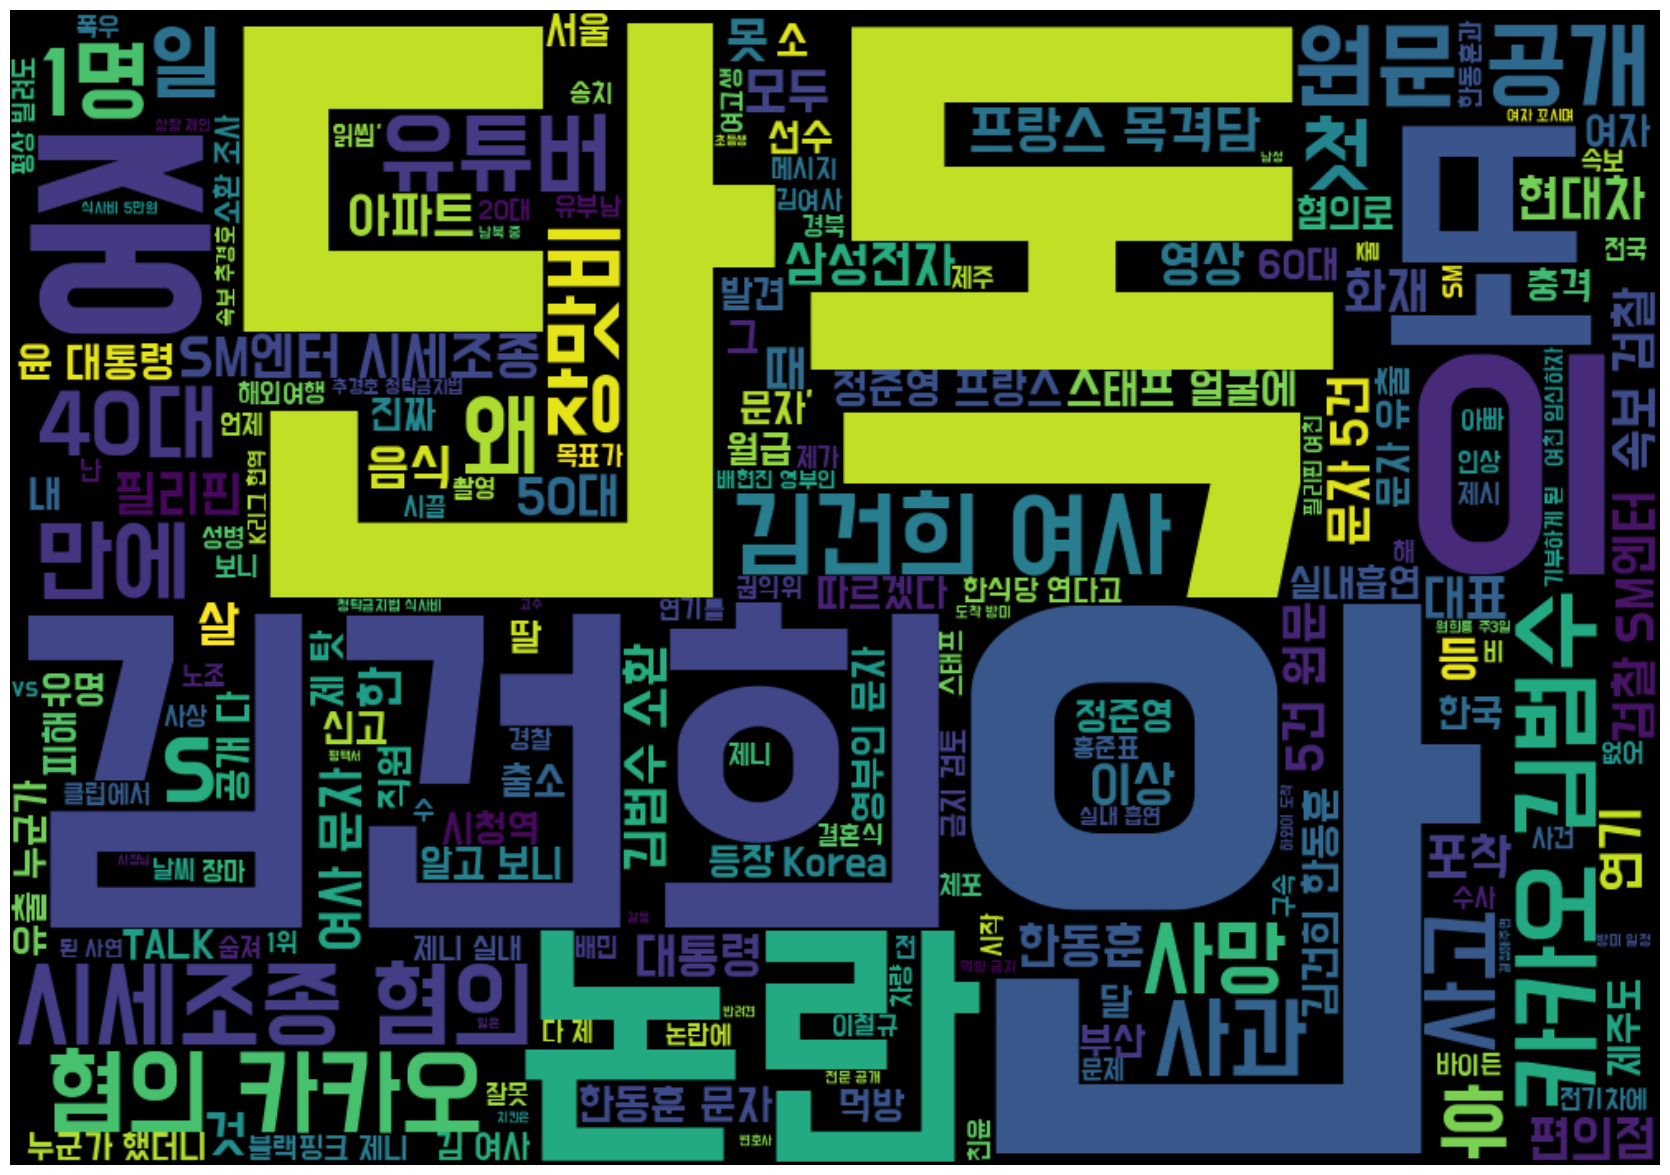

In [10]:
font_path = '/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))

wc = WordCloud(width=1000, height=700, font_path=font_path).generate(text)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

## 5.많이 본 뉴스와 댓글이 많은 뉴스 비교

### 댓글이 많은 뉴스 크롤링

In [11]:
# 1) 데이터 프레임 생성
re_data = pd.DataFrame(columns=['언론사명', '순위', '기사제목', '기사링크', '수집일자'])

# 2) 네이버 댓글이 많은 뉴스 URL
url ='https://news.naver.com/main/ranking/popularMemo.naver'

# 3) url 접속하여 html 가져오기
html = urlopen(url)

# 4) HTML 태크 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser')

# 5) 네이버 랭킹 정보가 있는 div만 추출 -> rankingnews_box 가져오기
div = soup.find_all('div', {'class': 'rankingnews_box'})

# 6) 네이버 랭킹 언론사명, 기사제목 등 데이터 수집

for index_div in range(0, len(div)):

  # 언론사명 추출
  strong = div[index_div].find('strong', {'class': 'rankingnews_name'})
  press = strong.text
  print(press)

  # 5개의 순위 기사 정보 추출
  ul = div[index_div].find_all('ul', {'class': 'rankingnews_list'})

  for index_r in range(0, len(ul)):
    li = ul[index_r].find_all('li')

    for index_l in range(0, len(li)):
      try:
        rank = li[index_l].find('em', {'class': 'list_ranking_num'}).text
        title = li[index_l].find('a').text
        link = li[index_l].find('a').attrs['href']

        temp_df = pd.DataFrame({'언론사명': press,
                                '순위': rank,
                                '기사제목': title,
                                '기사링크': link,
                                '수집일자': datetime.datetime.now(timezone('Asia/Seoul'))},
                               index=['순위'])

        re_data = pd.concat([re_data, temp_df], ignore_index=True)

      except:
        pass

      print('Complets of ' + rank + ' : ' + title)

print('-' *50)
print(re_data.info())

한국경제TV
Complets of 1 : '부자아빠' 기요사키 "역사상 최악의 폭락장 대비해야"
Complets of 2 : 현대차, 임금 4.65% 인상 잠정합의
Complets of 3 : 반도체 죽다 살았는데…삼성노조 "파업으로 못번 돈 달라"
Complets of 4 : 현대차 노사 임금협상 잠정합의…10~11일 파업 유보
Complets of 5 : 윤 대통령 탄핵청원 130만…청문회 준비
한겨레
Complets of 1 : 김건희 여사-한동훈 후보 ‘문자 5건’ 원문 공개
Complets of 2 : 임성근, ‘월권’은 맞지만 ‘직권남용’은 아니라는 경찰
Complets of 3 : [단독] 백종원 ‘이름 빨’ 3년…가맹점 수명, 업계 평균 절반도 안 돼
Complets of 4 : [단독] 김건희, ‘문자 파동’에 해명 “내가 당사자…가까웠던 한동훈과 의논은 당연”
Complets of 5 : 알 못 낳는다고…수컷 병아리 매년 5000만마리 학살
MBN
Complets of 1 : 윤 대통령 "남북 중 누가 더 중요하냐" 러 향해 경고
Complets of 2 : 배현진, 이철규 저격 "영부인 문자 유출, 누군가 했더니"
Complets of 3 : 삼성전자 사상 첫 총파업…반도체 생산 차질 현실화되나
Complets of 4 : 이재명 '사법리스크' 10월 중대 고비…"정치 보복" vs "통상 절차"
Complets of 5 : 이철희 "영부인 사과했어도 총선 패배…대통령이 총선 말아드셔"
매일경제
Complets of 1 : ‘김건희 문자’ 전문 공개…“다 제 잘못, 백배 사과드리겠다”
Complets of 2 : “기본급 500%·1800만원·주식 25주”...현대차노조 ‘듬뿍’ 받고 파업 안할 듯
Complets of 3 : 메이크업 중 스태프에 연기 내뿜는 제니...“그 잠깐 못참나” 실내흡연 ‘발칵’
Complets of 4 : 빗속 뚫고 3천명 ‘빨간 띠’ 둘렀다…삼성 반도체 생산 차질 우려에 외신도 우려
Complets of 5 : 

### 워드 클라우드를 위한 전처리

In [12]:
# 기사 제목을 활용한 워드 클라우드 -> text (텍스트 뭉치) 형태로 변환
re_text = ' '.join(li for li in re_data['기사제목'].astype(str))
re_text

'\'부자아빠\' 기요사키 "역사상 최악의 폭락장 대비해야" 현대차, 임금 4.65% 인상 잠정합의 반도체 죽다 살았는데…삼성노조 "파업으로 못번 돈 달라" 현대차 노사 임금협상 잠정합의…10~11일 파업 유보 윤 대통령 탄핵청원 130만…청문회 준비 김건희 여사-한동훈 후보 ‘문자 5건’ 원문 공개 임성근, ‘월권’은 맞지만 ‘직권남용’은 아니라는 경찰 [단독] 백종원 ‘이름 빨’ 3년…가맹점 수명, 업계 평균 절반도 안 돼 [단독] 김건희, ‘문자 파동’에 해명 “내가 당사자…가까웠던 한동훈과 의논은 당연” 알 못 낳는다고…수컷 병아리 매년 5000만마리 학살 윤 대통령 "남북 중 누가 더 중요하냐" 러 향해 경고 배현진, 이철규 저격 "영부인 문자 유출, 누군가 했더니" 삼성전자 사상 첫 총파업…반도체 생산 차질 현실화되나 이재명 \'사법리스크\' 10월 중대 고비…"정치 보복" vs "통상 절차" 이철희 "영부인 사과했어도 총선 패배…대통령이 총선 말아드셔" ‘김건희 문자’ 전문 공개…“다 제 잘못, 백배 사과드리겠다” “기본급 500%·1800만원·주식 25주”...현대차노조 ‘듬뿍’ 받고 파업 안할 듯 메이크업 중 스태프에 연기 내뿜는 제니...“그 잠깐 못참나” 실내흡연 ‘발칵’ 빗속 뚫고 3천명 ‘빨간 띠’ 둘렀다…삼성 반도체 생산 차질 우려에 외신도 우려 국회 법사위, 오늘 ‘尹탄핵 국민청원’ 청문회 계획서 채택 7월 말과 8월 초 ‘전 국민이 쉬자’ ‘남미새’는 어떻게 빌런으로 부상했나 10만 제비떼, 올해도 볼 수 있을까 리튬 배터리 화재, 군대서 매년 9건 발생했는데… 반복되는 ‘꿀벌 실종’, 인간을 의심하라 \'해병 순직\' 사건 수사 1년 만에 마무리…임성근 전 사단장 \'무혐의\' 윤대통령, 이르면 오늘 \'해병 특검법\' 재의요구권 행사할 듯 러 "남북 중 결정하라는 윤대통령 발언, 동의 안 해" [이 시각 핫뉴스] "평상 빌려도 치킨은 안돼"…제주 관광 또 시끌 外 윤 대통령 "러, 남북 중 어디가 중요한지 잘 판단해야" 이럴수가

### 워드 클라우드 시각화

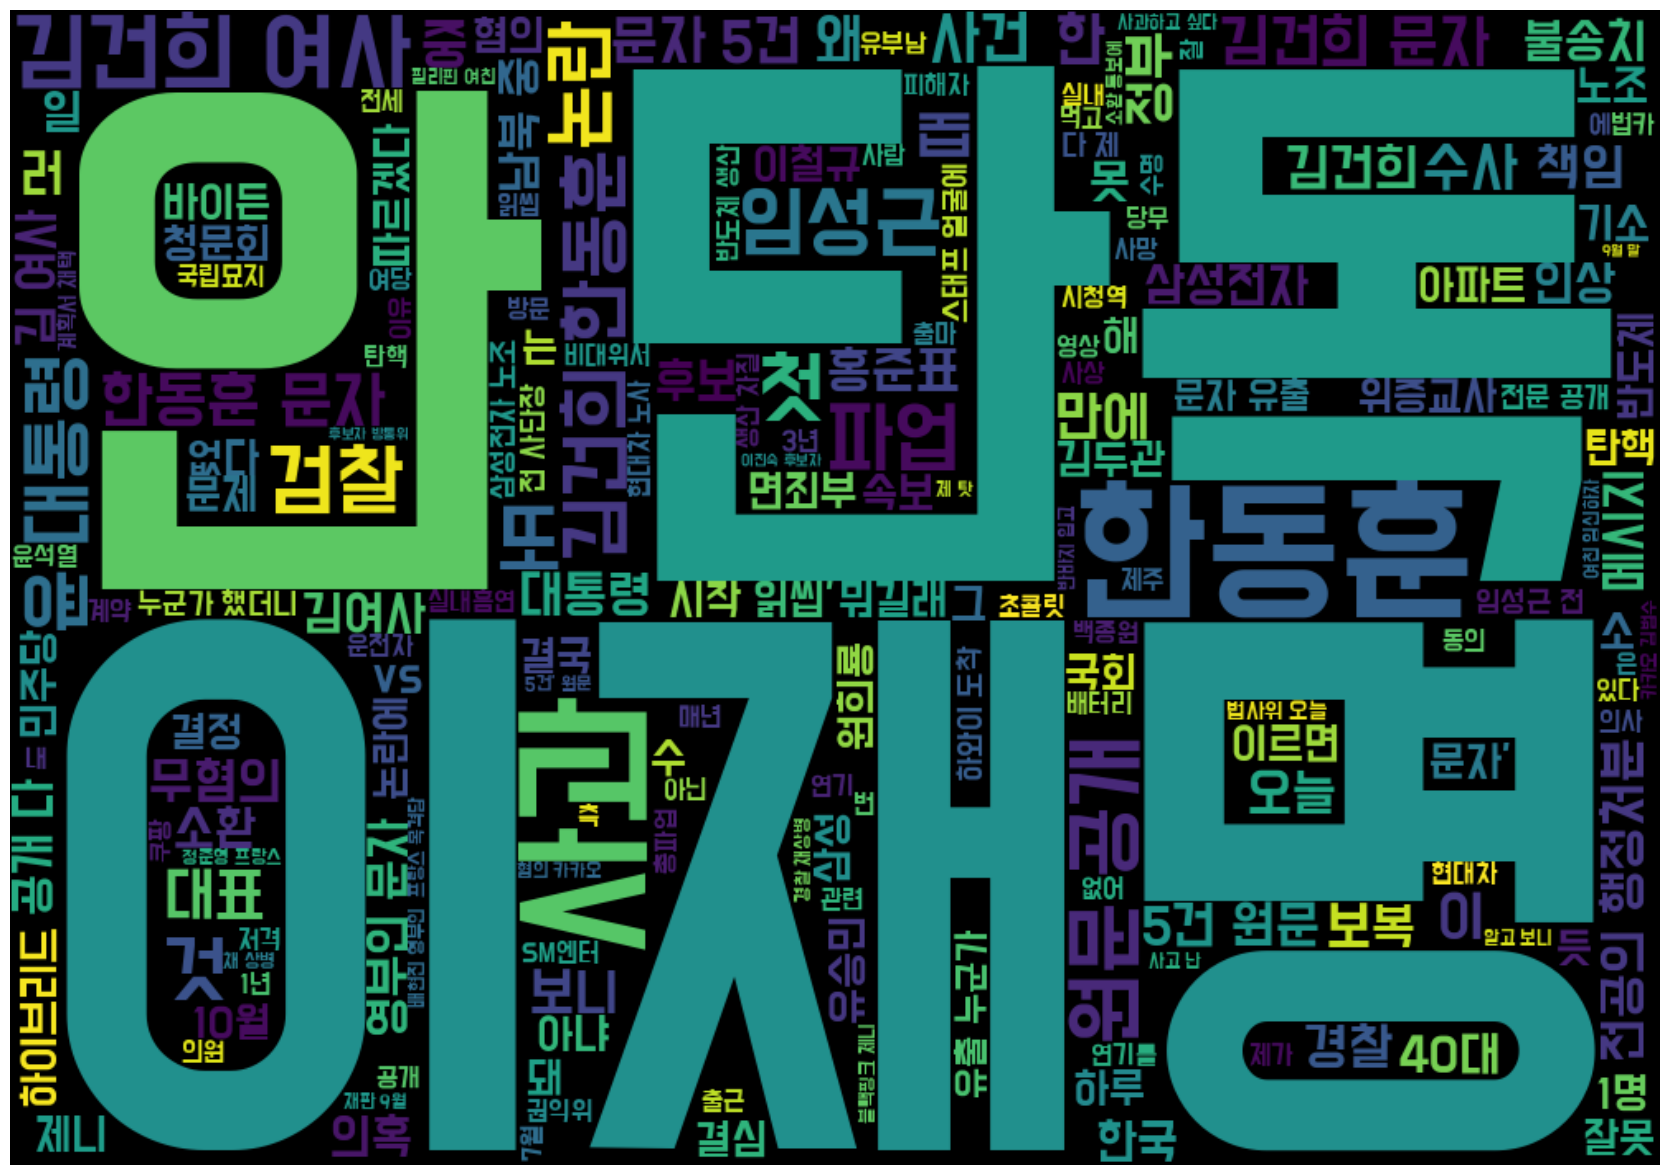

In [14]:
font_path = '/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))

re_wc = WordCloud(width=1000, height=700, font_path=font_path).generate(re_text)

plt.axis('off')
plt.imshow(re_wc, interpolation='bilinear')
plt.show()

### 많이본 뉴스와 댓글이 많은 뉴스 비교 시각화

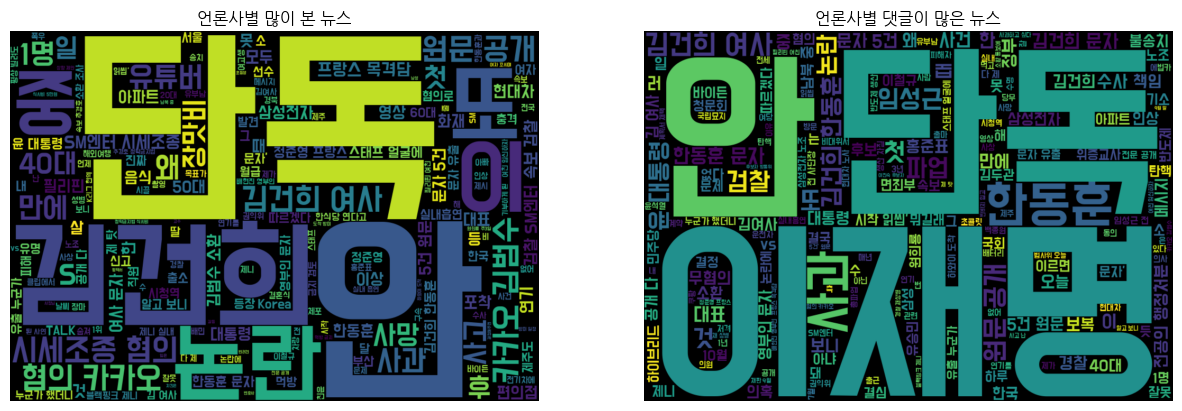

In [15]:
fig = plt.figure(figsize=(15, 5))

rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(wc, interpolation='bilinear')
ax1.set_title('언론사별 많이 본 뉴스')
ax1.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(re_wc, interpolation='bilinear')
ax2.set_title('언론사별 댓글이 많은 뉴스')
ax2.axis('off')

plt.show()

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 많이 본 뉴스와 댓글이 많은 뉴스 명사 TOP 10개 비교

In [19]:
#기사 제목을 텍스트로 변환
d_text = ' '.join(li for li in data['기사제목'].astype(str))
m_text = ' '.join(li for li in re_data['기사제목'].astype(str))

In [24]:
#명사 단어 추출
# konlpy 한국어 자연어 처리를 위한 패키지
komoran = konlpy.tag.Komoran() # Kkma, Komoran, okt 형태소 분석기
d_nn = komoran.nouns(d_text)
m_nn = komoran.nouns(m_text)

In [27]:
#데이터 프레임으로 변환
d_word_df = pd.DataFrame({'word' : d_nn})
m_word_df = pd.DataFrame({'word' : m_nn})

In [31]:
#단어의 수 컬럼으로 추가
d_word_df['count'] = d_word_df['word'].str.len()
m_word_df['count'] = m_word_df['word'].str.len()

In [32]:
m_word_df

,word,count
0,부자,2
1,아빠,2
2,기요,2
3,사키,2
4,역사,2
...,...,...
2889,주가,2
2890,시크,2
2891,한,1
2892,분석,2


In [33]:
#글자수가 2개 이상인 단어만 사용
d_word_df = d_word_df.query('count >= 2')
m_word_df = m_word_df.query('count >= 2')

In [35]:
print('많이 본 뉴스 단어', d_word_df.shape)
print('댓글이 많은 뉴스 단어', m_word_df.shape)

많이 본 뉴스 단어 (2454, 2)
댓글이 많은 뉴스 단어 (2402, 2)


In [36]:
#많이 본 뉴스와 댓글이 많은 뉴스 명사 TOP 10개 비교
#단어와 빈도표 만들기
d_group_df = d_word_df.groupby('word', as_index=False).agg(n=('word', 'count')).sort_values('n', ascending=False)
m_group_df = m_word_df.groupby('word', as_index=False).agg(n=('word', 'count')).sort_values('n', ascending=False)

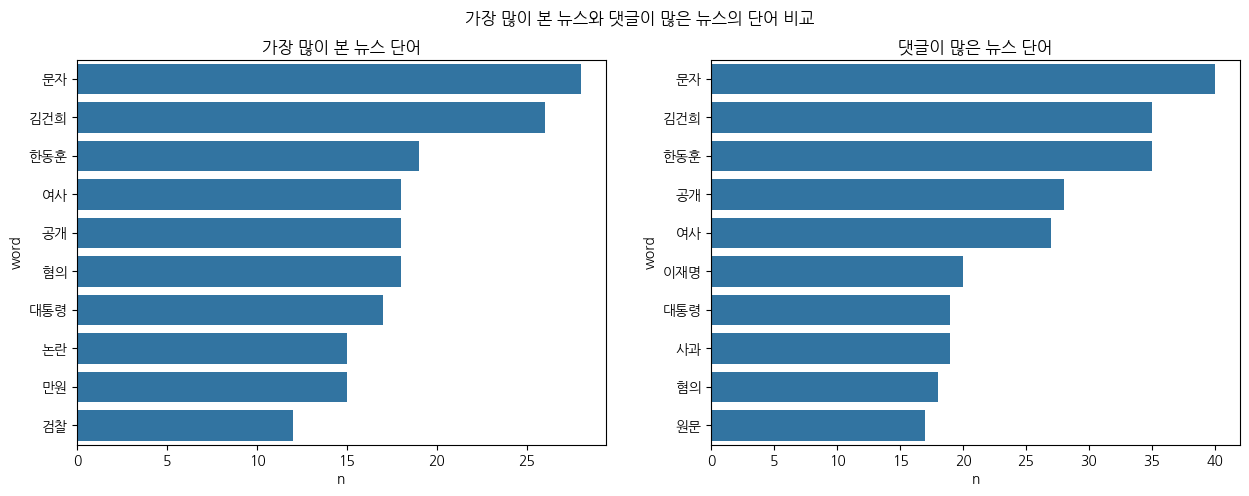

In [40]:
#단어 빈도 막대 그래프

fig, axes = plt.subplots(1,2, figsize=(15, 5))
plt.suptitle('가장 많이 본 뉴스와 댓글이 많은 뉴스의 단어 비교')

sns.barplot(data=d_group_df.head(10), y='word', x='n', ax=axes[0])
axes[0].set_title('가장 많이 본 뉴스 단어')

sns.barplot(data=m_group_df.head(10), y='word', x='n', ax=axes[1])
axes[1].set_title('댓글이 많은 뉴스 단어')

plt.show()

In [41]:
#워드 클라우드 시각화를 위한 딕셔너리 준비
d_word_dic = d_group_df.set_index('word').to_dict()['n']
m_word_dic = m_group_df.set_index('word').to_dict()['n']

In [43]:
d_wc = WordCloud(width=1000, height=700, font_path=font_path).generate_from_frequencies(d_word_dic)
m_wc = WordCloud(width=1000, height=700, font_path=font_path).generate_from_frequencies(m_word_dic)

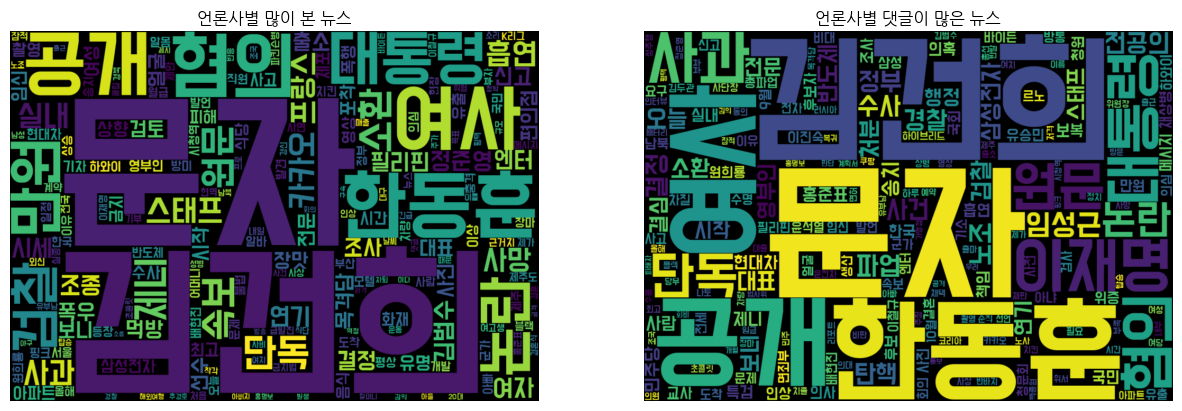

In [44]:
fig = plt.figure(figsize=(15, 5))

rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(d_wc, interpolation='bilinear')
ax1.set_title('언론사별 많이 본 뉴스')
ax1.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(m_wc, interpolation='bilinear')
ax2.set_title('언론사별 댓글이 많은 뉴스')
ax2.axis('off')

plt.show()